In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, KFold

# Carregando as variáveis train e validation do dataset CIC Train50

In [2]:
import pickle

In [3]:
with open('df_cic_train50_with_preprocessing_getdummies_standadscaler', mode = 'rb') as f:
    X_train50_train, X_train50_test, y_train50_multiclass_train, y_train50_multiclass_test, y_train50_binary_train, y_train50_binary_test = pickle.load(f)

In [4]:
print('X treino = ', X_train50_train.shape)
print('X teste = ', X_train50_test.shape)
print('y multiclasse treino = ', y_train50_multiclass_train.shape)
print('y multiclasse teste = ', y_train50_multiclass_test.shape)
print('y binário treino = ', y_train50_binary_train.shape)
print('y binário teste = ', y_train50_binary_test.shape)

X treino =  (990755, 80)
X teste =  (424610, 80)
y multiclasse treino =  (990755,)
y multiclasse teste =  (424610,)
y binário treino =  (990755,)
y binário teste =  (424610,)


In [5]:
#X_train50_train.head()
X_train50_train

array([[-0.45400497, -0.01017476, -0.00894014, ...,  0.50382628,
        -0.30771802, -0.36215877],
       [-0.45418212, -0.00909654, -0.00732026, ...,  0.50382628,
        -0.30771802, -0.36215877],
       [ 2.39635143, -0.00586188, -0.00489045, ...,  0.50382628,
        -0.30771802, -0.36215877],
       ...,
       [-0.45175715, -0.01125298, -0.00975008, ...,  0.50382628,
        -0.30771802, -0.36215877],
       [-0.45414392, -0.01017476, -0.00894014, ...,  0.50382628,
        -0.30771802, -0.36215877],
       [-0.45555051, -0.01017476, -0.00894014, ...,  0.50382628,
        -0.30771802, -0.36215877]])

In [6]:
#print(y_train50_multiclass_train.unique())
#print(y_train50_binary_train.unique())
print(y_train50_multiclass_train)
print(y_train50_binary_train)

1008718    BENIGN
1092907    BENIGN
1034897       DoS
727692     BENIGN
1200733    BENIGN
            ...  
259178     BENIGN
1414414    BENIGN
131932     BENIGN
671155     BENIGN
121958     BENIGN
Name: Label_multiclass, Length: 990755, dtype: object
1008718    0
1092907    0
1034897    1
727692     0
1200733    0
          ..
259178     0
1414414    0
131932     0
671155     0
121958     0
Name: Label_binary, Length: 990755, dtype: int64


In [7]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [8]:
#X_train50_train = X_train50_train.to_numpy()
y_train50_multiclass_train = y_train50_multiclass_train.to_numpy()
y_train50_binary_train = y_train50_binary_train.to_numpy()
#X_train50_test = X_train50_test.to_numpy()
y_train50_multiclass_test = y_train50_multiclass_test.to_numpy()
y_train50_binary_test = y_train50_binary_test.to_numpy()

In [9]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Carregando as variáveis do dataset CIC Test50

In [10]:
with open('df_cic_test50_with_preprocessing_getdummies_standadscaler', mode = 'rb') as f:
    X_test50, y_test50_multiclass, y_test50_binary = pickle.load(f)

In [11]:
print('X = ', X_test50.shape)
print('y multiclasse = ', y_test50_multiclass.shape)
print('y binário = ', y_test50_binary.shape)

X =  (1415365, 80)
y multiclasse =  (1415365,)
y binário =  (1415365,)


In [12]:
print(type(X_test50))
print(type(y_test50_multiclass))
print(type(y_test50_binary))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [13]:
y_test50_multiclass = y_test50_multiclass.to_numpy()
y_test50_binary = y_test50_binary.to_numpy()

In [14]:
print(type(X_test50))
print(type(y_test50_multiclass))
print(type(y_test50_binary))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [15]:
#y_test50_binary.value_counts()
y_test50_binary

array([0, 1, 0, ..., 0, 1, 0])

In [16]:
#y_test50_multiclass.value_counts()
y_test50_multiclass

array(['BENIGN', 'DoS', 'BENIGN', ..., 'BENIGN', 'DoS', 'BENIGN'],
      dtype=object)

In [17]:
#X_test50.head()
X_test50

array([[-0.28448187, -0.00909654, -0.00975008, ...,  0.50382628,
        -0.30771802, -0.36215877],
       [-0.45555571, -0.01017476, -0.01056002, ...,  0.50382628,
        -0.30771802, -0.36215877],
       [-0.45555115, -0.01017476, -0.00894014, ...,  0.50382628,
        -0.30771802, -0.36215877],
       ...,
       [-0.45555202, -0.01017476, -0.00894014, ...,  0.50382628,
        -0.30771802, -0.36215877],
       [ 1.95806854, -0.00478366, -0.00570039, ...,  0.50382628,
        -0.30771802, -0.36215877],
       [-0.45466967, -0.01125298, -0.00975008, ...,  0.50382628,
        -0.30771802, -0.36215877]])

In [18]:
#print(y_test50_multiclass.unique())
#print(y_test50_binary.unique())
print(y_test50_multiclass)
print(y_test50_binary)

['BENIGN' 'DoS' 'BENIGN' ... 'BENIGN' 'DoS' 'BENIGN']
[0 1 0 ... 0 1 0]


# Algoritmo kNN para Train e Validation - Train50

In [19]:
from sklearn.neighbors import KNeighborsClassifier

### Predição train50 binária

In [20]:
knn_train50_binary = KNeighborsClassifier(n_neighbors=4, p=2)

In [21]:
knn_train50_binary.fit(X_train50_train, y_train50_binary_train)

KNeighborsClassifier(n_neighbors=4)

In [22]:
predict_train50_binary = knn_train50_binary.predict(X_train50_test)

In [23]:
predict_train50_binary

array([1, 1, 0, ..., 1, 1, 0])

In [24]:
y_train50_binary_test

array([1, 1, 0, ..., 1, 1, 0])

In [25]:
accuracy_score(y_train50_binary_test, predict_train50_binary)

0.9989166529285698

### Visualização da árvore binária

In [26]:
#from sklearn import tree
#from dtreeviz.trees import dtreeviz
#from matplotlib import pyplot as plt
#plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
#plt.rcParams.update({'font.size': 14})

In [27]:
#plt.figure(figsize=(20,10))
#grafic = tree.plot_tree(xgb_train50_binary.estimators_[0], feature_names=X_train50_train.columns, filled=True)

In [28]:
#viz = dtreeviz(xgb_train50_binary.estimators_[0], X_train50_train, y_train50_binary_train, feature_names=X_train50_train.columns, target_name='Label_binary')
#viz

In [29]:
#fig, ax = plt.subplots(figsize=(20,30))
#lgb.plot_importance(lgb_train50_binary, ax=ax)

### Predição train50 multiclasse

In [30]:
knn_train50_multiclass =  KNeighborsClassifier(n_neighbors=4, p=2)

In [31]:
knn_train50_multiclass.fit(X_train50_train, y_train50_multiclass_train)

KNeighborsClassifier(n_neighbors=4)

In [32]:
predict_train50_multiclass = knn_train50_multiclass.predict(X_train50_test)

In [33]:
predict_train50_multiclass

array(['DoS', 'PortScan', 'BENIGN', ..., 'DoS', 'DoS', 'BENIGN'],
      dtype=object)

In [34]:
y_train50_multiclass_test

array(['DoS', 'PortScan', 'BENIGN', ..., 'DoS', 'DoS', 'BENIGN'],
      dtype=object)

In [35]:
accuracy_score(y_train50_multiclass_test, predict_train50_multiclass)

0.9988931019052778

### Visualização da árvore multiclasse

In [36]:
#plt.figure(figsize=(20,10))
#grafic = tree.plot_tree(xgb_train50_multiclass.estimators_[0], feature_names=X_train50_train.columns, filled=True)

In [37]:
#viz = dtreeviz(xgb_train50_multiclass.estimators_[0], X_train50_train, y_train50_multiclass_train, feature_names=X_train50_train.columns, target_name='Label_multiclass')
#viz

In [38]:
#fig, ax = plt.subplots(figsize=(20,30))
#lgb.plot_importance(lgb_train50_binary, ax=ax)

In [39]:
#lgb.plot_tree(lgb_train50_binary, figsize=(20,6), tree_index=0, dpi=100)

### Precision e Recall do train50

In [40]:
print(classification_report(y_train50_binary_test, predict_train50_binary, digits=6, zero_division=1))

              precision    recall  f1-score   support

           0   0.999223  0.999428  0.999326    341041
           1   0.997665  0.996829  0.997247     83569

    accuracy                       0.998917    424610
   macro avg   0.998444  0.998129  0.998286    424610
weighted avg   0.998916  0.998917  0.998916    424610



In [41]:
print(classification_report(y_train50_multiclass_test, predict_train50_multiclass, digits=6, zero_division=1))

              precision    recall  f1-score   support

      BENIGN   0.999220  0.999428  0.999324    341041
      BotNet   0.888000  0.730263  0.801444       304
  BruteForce   1.000000  0.998081  0.999039      2084
        DDoS   0.999212  0.998792  0.999002     19034
         DoS   0.996160  0.996107  0.996133     37760
Infiltration   0.333333  0.333333  0.333333         3
    PortScan   0.999875  0.999792  0.999834     24061
   WebAttack   0.965839  0.962848  0.964341       323

    accuracy                       0.998893    424610
   macro avg   0.897705  0.877331  0.886556    424610
weighted avg   0.998879  0.998893  0.998880    424610



### Cross Validation do train50

In [42]:
# cross validation binary
cv_result_train50_binary = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)   
score_cv_train50_binary = cross_val_score(knn_train50_binary, X_train50_train, y_train50_binary_train, cv=kfold)
cv_result_train50_binary.append(score_cv_train50_binary.mean())

In [43]:
score_cv_train50_binary

array([0.99897049, 0.99869797, 0.99882918, 0.99863741, 0.99883927,
       0.99880898, 0.99872824, 0.99902094, 0.99884936, 0.99897048])

In [44]:
cv_result_train50_binary

[0.9988352319209459]

In [45]:
# cross validation multiclass
cv_result_train50_multiclass = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)   
score_cv_train50_multiclass = cross_val_score(knn_train50_multiclass, X_train50_train, y_train50_multiclass_train, cv=kfold)
cv_result_train50_multiclass.append(score_cv_train50_multiclass.mean())

In [46]:
score_cv_train50_multiclass

array([0.99893011, 0.99867778, 0.99878881, 0.99857685, 0.998809  ,
       0.9987787 , 0.99868786, 0.99896038, 0.99882917, 0.9989301 ])

In [47]:
cv_result_train50_multiclass

[0.9987968773327776]

### Matriz de Confusão do train50

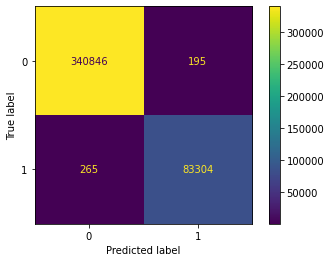

In [48]:
ConfusionMatrixDisplay.from_estimator(knn_train50_binary, X_train50_test, y_train50_binary_test)
plt.show()

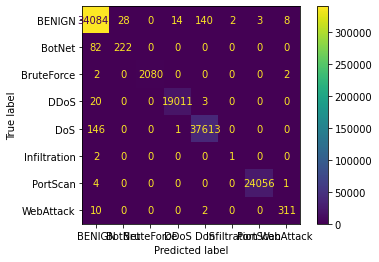

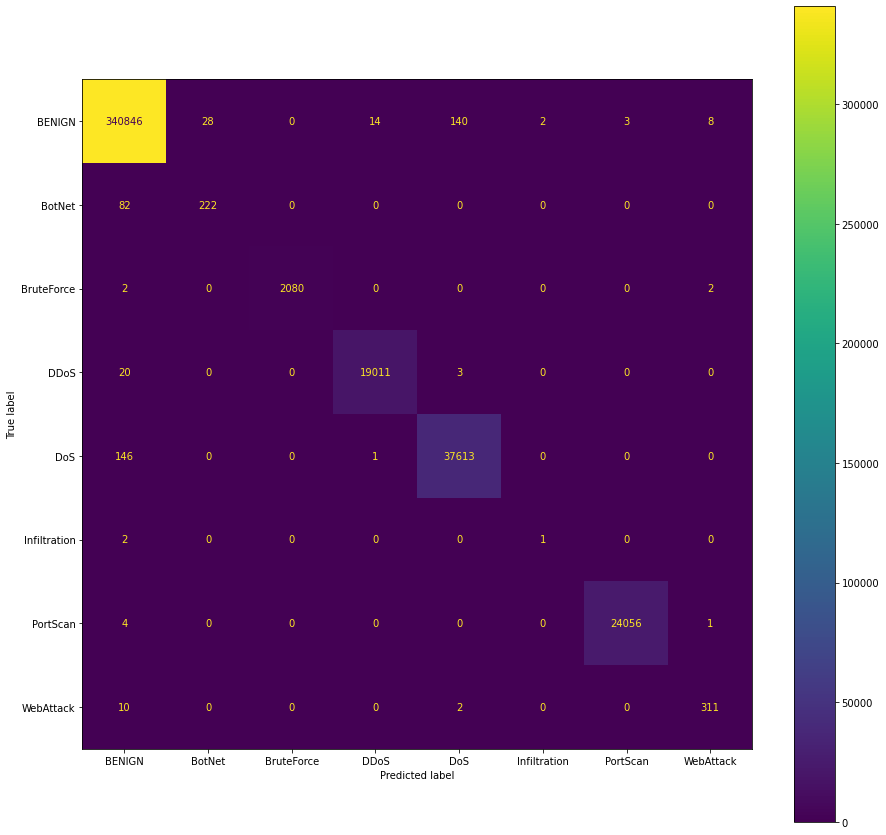

In [49]:
#ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_train50_test, y_train50_multiclass_test)
#plt.show()

cm_knn_multiclass_train = ConfusionMatrixDisplay.from_estimator(knn_train50_multiclass, X_train50_test, y_train50_multiclass_test)
fig, ax = plt.subplots(figsize=(15,15))
cm_knn_multiclass_train.plot(ax=ax)

# Algoritmo kNN para Test50

### Predição Test50 binária

In [50]:
predict_test50_binary = knn_train50_binary.predict(X_test50)

In [51]:
predict_test50_binary

array([0, 1, 0, ..., 0, 1, 0])

In [52]:
y_test50_binary

array([0, 1, 0, ..., 0, 1, 0])

In [53]:
accuracy_score(y_test50_binary, predict_test50_binary)

0.9991528686946477

### Predição test50 multiclasse

In [54]:
predict_test50_multiclass = knn_train50_multiclass.predict(X_test50)

In [55]:
predict_test50_multiclass

array(['BENIGN', 'DoS', 'BENIGN', ..., 'BENIGN', 'DoS', 'BENIGN'],
      dtype=object)

In [56]:
y_test50_multiclass

array(['BENIGN', 'DoS', 'BENIGN', ..., 'BENIGN', 'DoS', 'BENIGN'],
      dtype=object)

In [57]:
accuracy_score(y_test50_multiclass, predict_test50_multiclass)

0.9991281400910719

### Precision e Recall do test50

In [58]:
print(classification_report(y_test50_binary, predict_test50_binary, digits=6, zero_division=1))

              precision    recall  f1-score   support

           0   0.999355  0.999590  0.999473   1136548
           1   0.998327  0.997371  0.997849    278817

    accuracy                       0.999153   1415365
   macro avg   0.998841  0.998481  0.998661   1415365
weighted avg   0.999153  0.999153  0.999153   1415365



In [59]:
print(classification_report(y_test50_multiclass, predict_test50_multiclass, digits=6, zero_division=1))

              precision    recall  f1-score   support

      BENIGN   0.999352  0.999590  0.999471   1136548
      BotNet   0.927208  0.791242  0.853846       982
  BruteForce   0.999710  0.997831  0.998770      6917
        DDoS   0.999437  0.999094  0.999266     64013
         DoS   0.997172  0.996612  0.996892    126330
  Heartbleed   1.000000  1.000000  1.000000         5
Infiltration   0.750000  0.352941  0.480000        17
    PortScan   0.999912  0.999811  0.999862     79464
   WebAttack   0.970507  0.966942  0.968721      1089

    accuracy                       0.999128   1415365
   macro avg   0.960366  0.900452  0.921870   1415365
weighted avg   0.999119  0.999128  0.999119   1415365



### Matriz de Confusão do test50

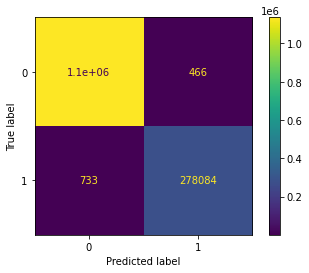

In [60]:
ConfusionMatrixDisplay.from_estimator(knn_train50_binary, X_test50, y_test50_binary)
plt.show()

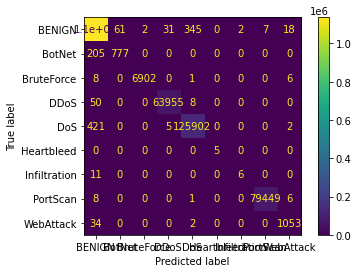

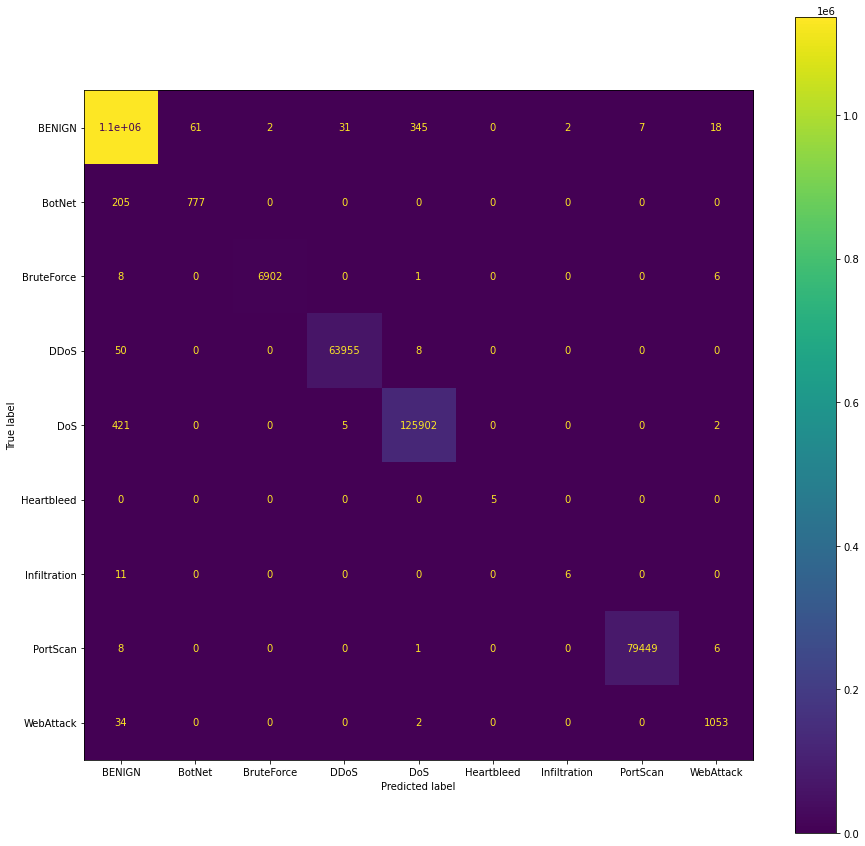

In [61]:
#ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_test50, y_test50_multiclass)
#plt.show()

cm_knn_multiclass_train = ConfusionMatrixDisplay.from_estimator(knn_train50_multiclass, X_test50, y_test50_multiclass)
fig, ax = plt.subplots(figsize=(15,15))
cm_knn_multiclass_train.plot(ax=ax)